In [54]:
# to read and wrangle data
import pandas as pd

# to import data from LA Data portal
from sodapy import Socrata

# to create spatial data
import geopandas as gpd

# for basemaps
import contextily as ctx

# For spatial statistics
import esda
from esda.moran import Moran, Moran_Local

import splot
from splot.esda import moran_scatterplot, plot_moran, lisa_cluster,plot_moran_simulation

import libpysal as lps

# Graphics
import matplotlib.pyplot as plt
import plotly.express as px

In [63]:
# population block group data from census reporter
mhp_carson = gpd.read_file('data/carson_acs2019_5yr_B03002_15000US060375433222.geojson')

In [64]:
# to illustrate, bring in tracts
mhp_tracts = gpd.read_file('data/tracts_acs2019_5yr_B03002_14000US06037544002.geojson')

<AxesSubplot:>

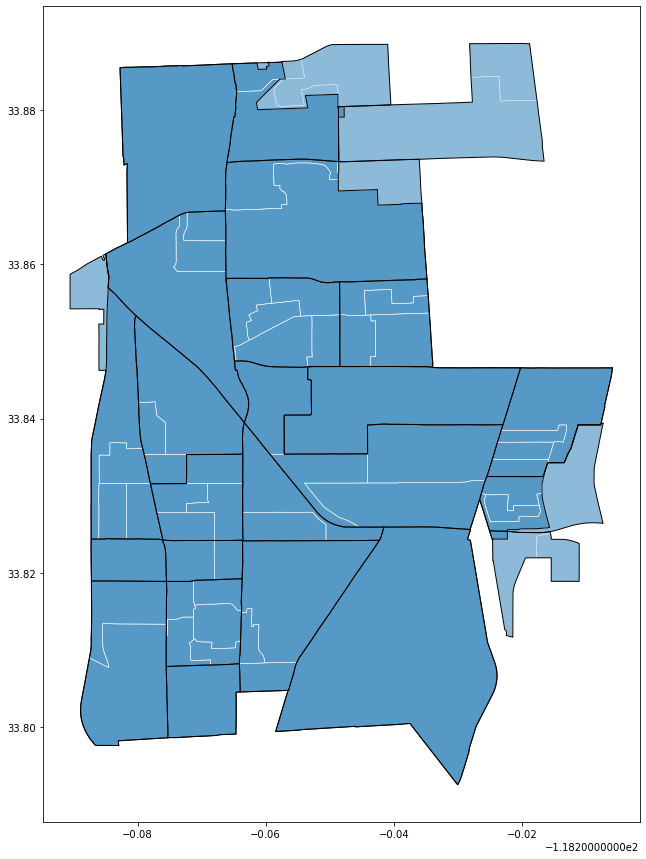

In [65]:
# compare
fig,ax = plt.subplots(figsize=(15,15))

# blue background of census tracts
mhp_tracts.plot(ax=ax,zorder=10,alpha=0.5)

# while lines to show block groups (sandwiched between the two layers above for visual clarity)
mhp_carson.boundary.plot(ax=ax,color='white',zorder=15,lw=0.5)

# black boundary lines of census tracts on top of everything
mhp_tracts.boundary.plot(ax=ax,color='black',zorder=20,lw=1)

In [58]:
# total bounds
minx,miny,maxx,maxy = mhp_tracts.total_bounds

(34.092546999999996, 33.588609000000005)

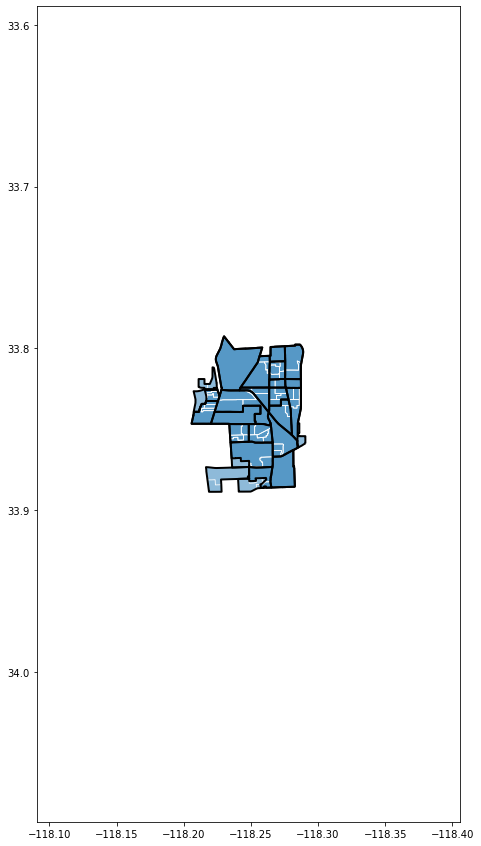

In [66]:
# compare
fig,ax = plt.subplots(figsize=(20,15))

# blue background of census tracts
mhp_tracts.plot(ax=ax,zorder=10,alpha=0.5)

# black boundary of census tracts
mhp_tracts.boundary.plot(ax=ax,color='black',zorder=20,lw=2)

# while lines to show block groups (sandwiched between the two layers above for visual clarity)
mhp_carson.boundary.plot(ax=ax,color='white',zorder=15,lw=0.8)

# zoom in
ax.set_xlim(minx+0.2,maxx-0.2) # zooming in just a bit
ax.set_ylim(miny+0.3,maxy-0.3)

In [67]:
mhp_carson.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   geoid             60 non-null     object  
 1   name              60 non-null     object  
 2   B03002001         60 non-null     float64 
 3   B03002001, Error  60 non-null     float64 
 4   B03002002         60 non-null     float64 
 5   B03002002, Error  60 non-null     float64 
 6   B03002003         60 non-null     float64 
 7   B03002003, Error  60 non-null     float64 
 8   B03002004         60 non-null     float64 
 9   B03002004, Error  60 non-null     float64 
 10  B03002005         60 non-null     float64 
 11  B03002005, Error  60 non-null     float64 
 12  B03002006         60 non-null     float64 
 13  B03002006, Error  60 non-null     float64 
 14  B03002007         60 non-null     float64 
 15  B03002007, Error  60 non-null     float64 
 16  B03002008         60

In [68]:
mhp_carson.head()

geoid                            name  B03002001  \
0  15000US060375410021  Block Group 1, Los Angeles, CA     3318.0   
1  15000US060375431005  Block Group 5, Los Angeles, CA      757.0   
2  15000US060375431006  Block Group 6, Los Angeles, CA      839.0   
3  15000US060375432024  Block Group 4, Los Angeles, CA     1219.0   
4  15000US060375433041  Block Group 1, Los Angeles, CA     1183.0   

   B03002001, Error  B03002002  B03002002, Error  B03002003  B03002003, Error  \
0             280.0     2360.0             353.0      485.0             166.0   
1             411.0      610.0             396.0        0.0              12.0   
2             304.0      799.0             293.0        0.0              12.0   
3             447.0      129.0             111.0        0.0              12.0   
4             385.0     1164.0             390.0      337.0             262.0   

   B03002004  B03002004, Error  ...  B03002017, Error  B03002018  \
0     1828.0             358.0  ...              12.0      470.0   
1      610.0             396.0  ...              12.0       84.0   
2      765.0             298.0  ...              12.0        0.0   
3      129.0             111.0  ...              12.0      662.0   
4      707.0             257.0  ...              12.0       19.0   

   B03002018, Error  B03002019  B03002019, Error  B03002020  B03002020, Error  \
0             184.0        0.0              12.0        0.0              12.0   
1             101.0        0.0              12.0        0.0              12.0   
2              12.0        0.0              12.0        0.0              12.0   
3             398.0        0.0              12.0        0.0              12.0   
4              32.0        0.0              12.0        0.0              12.0   

   B03002021  B03002021, Error  \
0        0.0              12.0   
1        0.0              12.0   
2        0.0              12.0   
3        0.0              12.0   
4        0.0              12.0   

                                            geometry  
0  MULTIPOLYGON (((-118.28273 33.88547, -118.2826...  
1  MULTIPOLYGON (((-118.26600 33.87342, -118.2659...  
2  MULTIPOLYGON (((-118.26523 33.88598, -118.2637...  
3  MULTIPOLYGON (((-118.24866 33.88042, -118.2482...  
4  MULTIPOLYGON (((-118.24459 33.85660, -118.2437...  

[5 rows x 45 columns]

In [70]:
# trim the data to the bare minimum columns
mhp_carson = mhp_carson[['geoid','B03002001','geometry']]

# rename the columns
mhp_carson.columns = ['FIPS','TotalPop','geometry']

In [72]:
mhp_carson.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   FIPS      60 non-null     object  
 1   TotalPop  60 non-null     float64 
 2   geometry  60 non-null     geometry
dtypes: float64(1), geometry(1), object(1)
memory usage: 1.5+ KB


In [73]:
mhp_carson.head()

FIPS  TotalPop  \
0  15000US060375410021    3318.0   
1  15000US060375431005     757.0   
2  15000US060375431006     839.0   
3  15000US060375432024    1219.0   
4  15000US060375433041    1183.0   

                                            geometry  
0  MULTIPOLYGON (((-118.28273 33.88547, -118.2826...  
1  MULTIPOLYGON (((-118.26600 33.87342, -118.2659...  
2  MULTIPOLYGON (((-118.26523 33.88598, -118.2637...  
3  MULTIPOLYGON (((-118.24866 33.88042, -118.2482...  
4  MULTIPOLYGON (((-118.24459 33.85660, -118.2437...

In [75]:
mhp_carson.tail()

FIPS  TotalPop  \
55  15000US060375440023    1103.0   
56  15000US060375723012    1755.0   
57  15000US060379800021       0.0   
58  15000US060379800251       0.0   
59       16000US0611530   92079.0   

                                             geometry  
55  MULTIPOLYGON (((-118.22588 33.82930, -118.2258...  
56  MULTIPOLYGON (((-118.22509 33.82548, -118.2237...  
57  MULTIPOLYGON (((-118.25753 33.80197, -118.2571...  
58  MULTIPOLYGON (((-118.25712 33.83927, -118.2571...  
59  MULTIPOLYGON (((-118.28888 33.80246, -118.2888...

In [76]:
# delete last row which is for the entire city of LA
mhp_carson = mhp_carson.drop(59)

In [78]:
mhp_carson.tail()

FIPS  TotalPop  \
54  15000US060375440022    1476.0   
55  15000US060375440023    1103.0   
56  15000US060375723012    1755.0   
57  15000US060379800021       0.0   
58  15000US060379800251       0.0   

                                             geometry  
54  MULTIPOLYGON (((-118.22604 33.83122, -118.2258...  
55  MULTIPOLYGON (((-118.22588 33.82930, -118.2258...  
56  MULTIPOLYGON (((-118.22509 33.82548, -118.2237...  
57  MULTIPOLYGON (((-118.25753 33.80197, -118.2571...  
58  MULTIPOLYGON (((-118.25712 33.83927, -118.2571...

In [80]:
# fix FIPS code
mhp_carson['FIPS'] = mhp_carson['FIPS'].str.replace('15000US','')
mhp_carson.tail()

FIPS  TotalPop                                           geometry
54  060375440022    1476.0  MULTIPOLYGON (((-118.22604 33.83122, -118.2258...
55  060375440023    1103.0  MULTIPOLYGON (((-118.22588 33.82930, -118.2258...
56  060375723012    1755.0  MULTIPOLYGON (((-118.22509 33.82548, -118.2237...
57  060379800021       0.0  MULTIPOLYGON (((-118.25753 33.80197, -118.2571...
58  060379800251       0.0  MULTIPOLYGON (((-118.25712 33.83927, -118.2571...

In [81]:
# sort by total pop
mhp_carson.sort_values(by='TotalPop').head(20)

FIPS  TotalPop                                           geometry
58  060379800251       0.0  MULTIPOLYGON (((-118.25712 33.83927, -118.2571...
57  060379800021       0.0  MULTIPOLYGON (((-118.25753 33.80197, -118.2571...
17  060375433224     414.0  MULTIPOLYGON (((-118.25360 33.84798, -118.2527...
10  060375433063     474.0  MULTIPOLYGON (((-118.26487 33.84746, -118.2646...
21  060375434003     532.0  MULTIPOLYGON (((-118.28494 33.86134, -118.2849...
49  060375440011     570.0  MULTIPOLYGON (((-118.22299 33.83919, -118.2225...
53  060375440021     608.0  MULTIPOLYGON (((-118.22662 33.82955, -118.2263...
46  060375439051     632.0  MULTIPOLYGON (((-118.26381 33.81625, -118.2637...
35  060375437025     736.0  MULTIPOLYGON (((-118.27549 33.81246, -118.2754...
1   060375431005     757.0  MULTIPOLYGON (((-118.26600 33.87342, -118.2659...
33  060375437023     798.0  MULTIPOLYGON (((-118.27194 33.81091, -118.2718...
2   060375431006     839.0  MULTIPOLYGON (((-118.26523 33.88598, -118.2637...
39  060375438013     871.0  MULTIPOLYGON (((-118.27896 33.83533, -118.2779...
41  060375438022     881.0  MULTIPOLYGON (((-118.27791 33.83156, -118.2749...
9   060375433062     946.0  MULTIPOLYGON (((-118.24412 33.83872, -118.2441...
14  060375433221    1059.0  MULTIPOLYGON (((-118.25948 33.85822, -118.2585...
55  060375440023    1103.0  MULTIPOLYGON (((-118.22588 33.82930, -118.2258...
22  060375435011    1111.0  MULTIPOLYGON (((-118.29052 33.85870, -118.2897...
50  060375440012    1118.0  MULTIPOLYGON (((-118.22549 33.83251, -118.2251...
51  060375440013    1148.0  MULTIPOLYGON (((-118.22355 33.83770, -118.2232...

In [82]:
# delete less than 100 population geographies
mhp_carson = mhp_carson[mhp_carson['TotalPop']>100]

In [83]:
# get the layers into a web mercator projection
# reproject to web mercator
mhp_carson = mhp_carson.to_crs(epsg=3857)

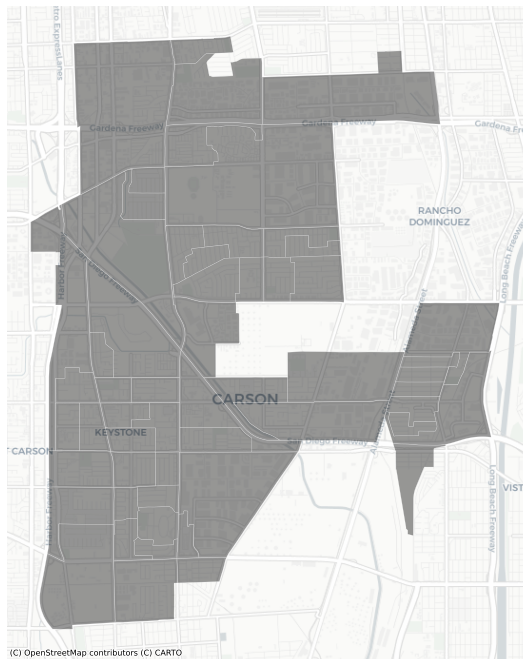

In [84]:
# plot it!
fig, ax = plt.subplots(figsize=(12,12))

mhp_carson.plot(ax=ax,
         color='black', 
         edgecolor='white',
         lw=0.5,
         alpha=0.4)

# no axis
ax.axis('off')

# add a basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

In [88]:
closedmhp = gpd.read_file('data/closedmhps_geocoded.geojson')

In [89]:
closedmhp.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Park Name           59 non-null     object  
 1   County              59 non-null     object  
 2   Park Identifier     59 non-null     object  
 3   Park Address        59 non-null     object  
 4   city                59 non-null     object  
 5   zipcode             59 non-null     int64   
 6   phone number        49 non-null     object  
 7   Fire Authority      59 non-null     object  
 8   Jurisdiction        59 non-null     object  
 9   MH Spaces           51 non-null     float64 
 10  RV Lots W/Drains    51 non-null     float64 
 11  RV Lots W/O Drains  51 non-null     float64 
 12  Operated by         50 non-null     object  
 13  lat                 59 non-null     float64 
 14  lon                 59 non-null     float64 
 15  geometry            59 non-null   

In [93]:
closedmhp['city'].value_counts()

 CARSON             6
 EL MONTE           5
 LOS ANGELES        5
 BALDWIN PARK       3
 GLENDALE           3
 INGLEWOOD          3
 ROSEMEAD           3
 SANTA CLARITA      2
 ACTON              2
 S EL MONTE         2
 POMONA             2
 DUARTE             2
 PICO RIVERA        2
 GARDENA            1
 WILMINGTON         1
 PASADENA           1
 MONTEREY PARK      1
 AGUA DULCE         1
 BURBANK            1
 SAN DIMAS          1
 HARBOR CITY        1
 HUNTINGTON PARK    1
 GLENDORA           1
 DOWNEY             1
 PARAMOUNT          1
 CASTAIC            1
 LAKE HUGHES        1
 SANTA MONICA       1
 LYNWOOD            1
 LAWNDALE           1
 BELLFLOWER         1
 AZUSA              1
Name: city, dtype: int64

In [94]:
closedmhps['total_unitspaces'] = closedmhps['MH Spaces'] + closedmhps['RV Lots W/Drains'] + closedmhps['RV Lots W/O Drains']

In [95]:
closedmhps['total_unitspaces'].head()

0    21.0
1    15.0
2    16.0
3    14.0
4    11.0
Name: total_unitspaces, dtype: float64

In [96]:
closedmhps.head()

Park Name       County Park Identifier  \
0   ALLGEYER PARK  LOS ANGELES      19-0005-MP   
1      GUILLEN TP  LOS ANGELES      19-0025-MP   
2      RES MOR TP  LOS ANGELES      19-0056-MP   
3    BLUE BIRD TP  LOS ANGELES      19-0067-MP   
4  BLUE BONNET TP  LOS ANGELES      19-0068-MP   

                                   Park Address           city  zipcode  \
0              2920 ALLGEYER,  EL MONTE , 91733       EL MONTE    91733   
1          1240 NADEAU ST,  LOS ANGELES , 90001    LOS ANGELES    90001   
2       13651 GARVEY AVE,  BALDWIN PARK , 91706   BALDWIN PARK    91706   
3      8827 E ARTESIA BLVD,  BELLFLOWER , 90706     BELLFLOWER    90706   
4  4432 MANHATTAN BEACH BLVD,  LAWNDALE , 90260       LAWNDALE    90260   

      phone number                                     Fire Authority  \
0   (310) 676-0663  COUNTY OF LOS ANGELES, 5823 RICKENBACKER RD., ...   
1   (213) 585-8828  HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...   
2   (310) 920-8148                                         null, null   
3   (310) 633-2955  COUNTY OF LOS ANGELES, 5823 RICKENBACKER RD., ...   
4   (310) 545-7498  COUNTY OF LOS ANGELES, 5823 RICKENBACKER RD., ...   

                                        Jurisdiction  MH Spaces  \
0  HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...       21.0   
1  HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...       15.0   
2  HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...       16.0   
3  HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...       11.0   
4  HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...       11.0   

   RV Lots W/Drains  RV Lots W/O Drains  \
0               0.0                 0.0   
1               0.0                 0.0   
2               0.0                 0.0   
3               0.0                 3.0   
4               0.0                 0.0   

                                         Operated by        lat         lon  \
0  FRANK, DORIS, 2239 PARKWAY DR #7, EL MONTE, CA...  34.059780 -118.018559   
1  GUILLEN, JOSE, C/O GUILLEN TRAILER PARK 1240 N...  33.967385 -118.253825   
2  LEE WAYNE & CO, 15865B GALE AVE SUITE # 428, C...  34.069674 -117.971467   
3  BOGGS, VIRGINIA, PO BOX 787, BELLFLOWER, CA 90706  33.874661 -118.151442   
4  LAWNDALE REDEVELOPMENT AGENCY, 14717 BURIN AVE...  33.887247 -118.353424   

                            geometry  total_unitspaces  
0  POINT (-13137765.868 4036831.838)              21.0  
1  POINT (-13163955.552 4024423.480)              15.0  
2  POINT (-13132523.668 4038161.424)              16.0  
3  POINT (-13152558.338 4011984.505)              14.0  
4  POINT (-13175042.942 4013672.115)              11.0

In [97]:
carson = closedmhp.city.value_counts().head(1).index.tolist()

In [98]:
carson

[' CARSON']

In [100]:
carsoncity = closedmhp[closedmhp['city']== ' CARSON']
carsoncity.shape

(6, 16)

In [101]:
carsoncity.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 6 entries, 15 to 57
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Park Name           6 non-null      object  
 1   County              6 non-null      object  
 2   Park Identifier     6 non-null      object  
 3   Park Address        6 non-null      object  
 4   city                6 non-null      object  
 5   zipcode             6 non-null      int64   
 6   phone number        6 non-null      object  
 7   Fire Authority      6 non-null      object  
 8   Jurisdiction        6 non-null      object  
 9   MH Spaces           6 non-null      float64 
 10  RV Lots W/Drains    6 non-null      float64 
 11  RV Lots W/O Drains  6 non-null      float64 
 12  Operated by         6 non-null      object  
 13  lat                 6 non-null      float64 
 14  lon                 6 non-null      float64 
 15  geometry            6 non-null    

In [102]:
carsoncity.head()

Park Name       County Park Identifier  \
15  MACKS TRAILER LODGE  LOS ANGELES      19-0390-MP   
22        SHADY NOOK TP  LOS ANGELES      19-0635-MP   
42        BEL ABBEY MHP  LOS ANGELES      19-1234-MP   
43         DOMINGUEZ TP  LOS ANGELES      19-1311-MP   
46       LITTLE DUDE TP  LOS ANGELES      19-1327-MP   

                            Park Address     city  zipcode     phone number  \
15  17524 S FIGUEROA ST,  CARSON , 90745   CARSON    90745   (213) 323-2312   
22   21009 PROSPECT AVE,  CARSON , 90810   CARSON    90810   (818) 442-0383   
42   200 E GARDENA BLVD,  CARSON , 90745   CARSON    90745   (310) 323-3073   
43    2666 DOMINGUEZ ST,  CARSON , 90810   CARSON    90810   (310) 679-2077   
46       630 E 220TH ST,  CARSON , 90745   CARSON    90745   (909) 595-8635   

                                       Fire Authority  \
15                                         null, null   
22  COUNTY OF LOS ANGELES, 5823 RICKENBACKER RD., ...   
42  COUNTY OF LOS ANGELES, 5823 RICKENBACKER RD., ...   
43  COUNTY OF LOS ANGELES, 5823 RICKENBACKER RD., ...   
46  COUNTY OF LOS ANGELES, 5823 RICKENBACKER RD., ...   

                                         Jurisdiction  MH Spaces  \
15  HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...       47.0   
22  HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...        6.0   
42  HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...       50.0   
43  HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...       31.0   
46  HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...       12.0   

    RV Lots W/Drains  RV Lots W/O Drains  \
15               0.0                 0.0   
22               0.0                 0.0   
42               0.0                 0.0   
43               0.0                 0.0   
46               0.0                 0.0   

                                          Operated by        lat         lon  \
15  BUCKLES, ROBERT, 1483 ALLENFORD AVE, LOS ANGEL...  33.845406 -118.284245   
22   CARLSEN, KENT, PO BOX 8321, LONG BEACH, CA 90808  33.839029 -118.218364   
42  HAPPY TRAILS, 334 GARDENA BLV., GARDENA, CA 90248  33.882030 -118.273250   
43  CITY OF CARSON, CA, 1 CIVIC PLAZA, #500, LONG ...  33.839110 -118.219237   
46    SHIMIZU, SIG, 630 E 220TH ST., CARSON, CA 90746  33.827767 -118.264843   

                             geometry  
15  POINT (-13167341.878 4008062.697)  
22  POINT (-13160008.111 4007207.968)  
42  POINT (-13166117.964 4012972.516)  
43  POINT (-13160105.265 4007218.835)  
46  POINT (-13165182.139 4005698.699)

In [103]:
# convert pandas dataframe to geodataframe
carsoncity = gpd.GeoDataFrame(carsoncity, 
                         crs='EPSG:4326',
                         geometry=gpd.points_from_xy(carsoncity.lon, carsoncity.lat))

In [104]:
# get the layers into a web mercator projection
# reproject to web mercator
carsoncity = carsoncity.to_crs(epsg=3857)

In [105]:
# convert lat/lon to floats
carsoncity.lon = carsoncity.lon.astype('float')
carsoncity.lat = carsoncity.lat.astype('float')

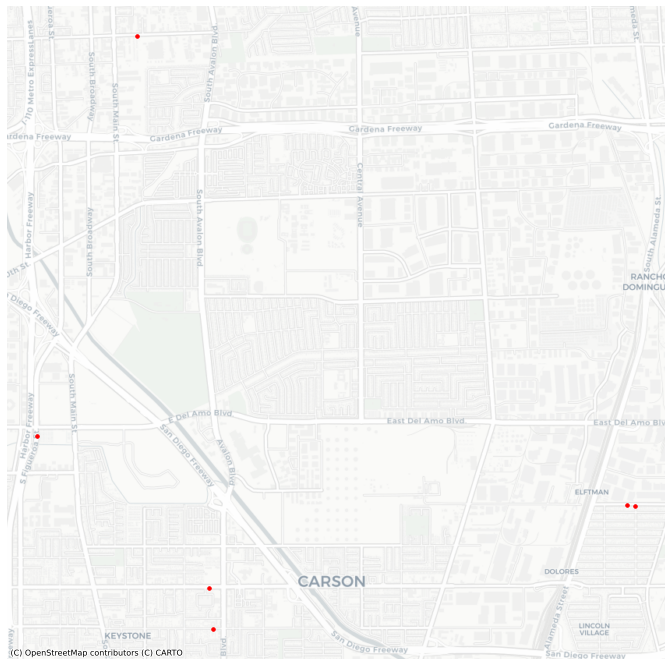

In [108]:
# map it!
fig,ax = plt.subplots(figsize=(12,12))

carsoncity.plot(ax=ax,
             color='red',
             markersize=12)

# no axis
ax.axis('off')

# add a basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

In [110]:
# get the bounding box coordinates for the arrest data
minx, miny, maxx, maxy = carsoncity.geometry.total_bounds
print(minx)
print(maxx)
print(miny)
print(maxy)

-13167341.877739018
-13160008.110867925
4005698.699315378
4012972.5156044518


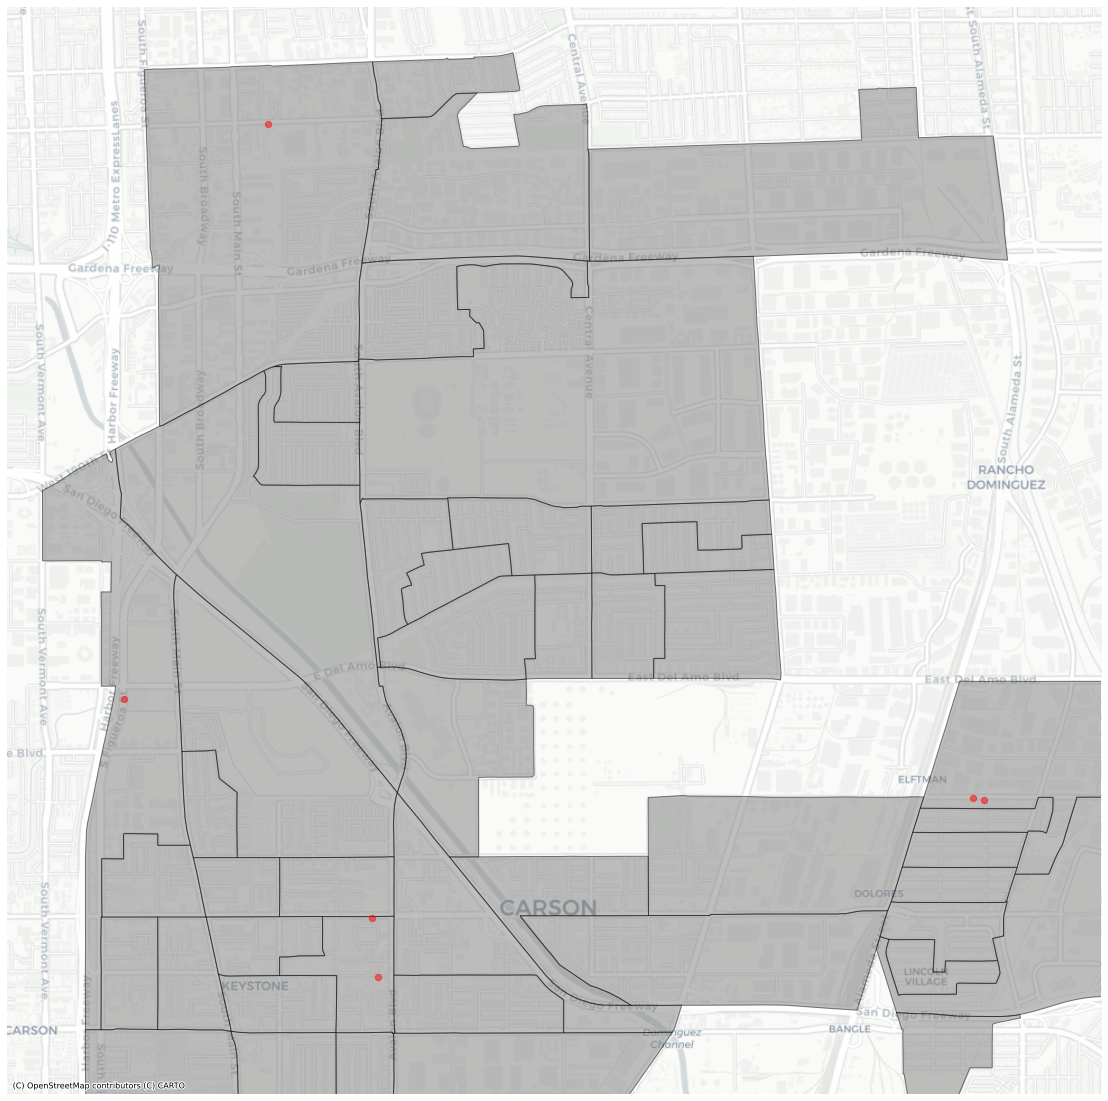

In [119]:
# set up the plot canvas with plt.subplots
fig, ax = plt.subplots(figsize=(20, 20))

# block groups
mhp_carson.plot(ax=ax, # this puts it in the ax plot
        color='gray', 
        edgecolor='black',
        alpha=0.5)

# number of mhp spaces/units in carson
carsoncity.plot(ax=ax, # this also puts it in the same ax plot
            color='red',
            markersize=40,
            alpha=0.5)

# use the bounding box coordinates to set the x and y limits
ax.set_xlim(minx - 1000, maxx + 1000) # added/substracted value is to give some margin around total bounds
ax.set_ylim(miny - 1000, maxy + 1000)

# no axis
ax.axis('off')

# add a basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

In [122]:
# Do the spatial join
carson_join = gpd.sjoin(carsoncity, mhp_carson, how='left')

In [123]:
carson_join.head()

Park Name       County Park Identifier  \
15  MACKS TRAILER LODGE  LOS ANGELES      19-0390-MP   
22        SHADY NOOK TP  LOS ANGELES      19-0635-MP   
42        BEL ABBEY MHP  LOS ANGELES      19-1234-MP   
43         DOMINGUEZ TP  LOS ANGELES      19-1311-MP   
46       LITTLE DUDE TP  LOS ANGELES      19-1327-MP   

                            Park Address     city  zipcode     phone number  \
15  17524 S FIGUEROA ST,  CARSON , 90745   CARSON    90745   (213) 323-2312   
22   21009 PROSPECT AVE,  CARSON , 90810   CARSON    90810   (818) 442-0383   
42   200 E GARDENA BLVD,  CARSON , 90745   CARSON    90745   (310) 323-3073   
43    2666 DOMINGUEZ ST,  CARSON , 90810   CARSON    90810   (310) 679-2077   
46       630 E 220TH ST,  CARSON , 90745   CARSON    90745   (909) 595-8635   

                                       Fire Authority  \
15                                         null, null   
22  COUNTY OF LOS ANGELES, 5823 RICKENBACKER RD., ...   
42  COUNTY OF LOS ANGELES, 5823 RICKENBACKER RD., ...   
43  COUNTY OF LOS ANGELES, 5823 RICKENBACKER RD., ...   
46  COUNTY OF LOS ANGELES, 5823 RICKENBACKER RD., ...   

                                         Jurisdiction  MH Spaces  \
15  HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...       47.0   
22  HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...        6.0   
42  HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...       50.0   
43  HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...       31.0   
46  HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...       12.0   

    RV Lots W/Drains  RV Lots W/O Drains  \
15               0.0                 0.0   
22               0.0                 0.0   
42               0.0                 0.0   
43               0.0                 0.0   
46               0.0                 0.0   

                                          Operated by        lat         lon  \
15  BUCKLES, ROBERT, 1483 ALLENFORD AVE, LOS ANGEL...  33.845406 -118.284245   
22   CARLSEN, KENT, PO BOX 8321, LONG BEACH, CA 90808  33.839029 -118.218364   
42  HAPPY TRAILS, 334 GARDENA BLV., GARDENA, CA 90248  33.882030 -118.273250   
43  CITY OF CARSON, CA, 1 CIVIC PLAZA, #500, LONG ...  33.839110 -118.219237   
46    SHIMIZU, SIG, 630 E 220TH ST., CARSON, CA 90746  33.827767 -118.264843   

                             geometry  index_right          FIPS  TotalPop  
15  POINT (-13167341.878 4008062.697)           22  060375435011    1111.0  
22  POINT (-13160008.111 4007207.968)           49  060375440011     570.0  
42  POINT (-13166117.964 4012972.516)            0  060375410021    3318.0  
43  POINT (-13160105.265 4007218.835)           49  060375440011     570.0  
46  POINT (-13165182.139 4005698.699)           43  060375438024    2001.0

In [129]:
mhp_by_gdf = carson_join.FIPS.value_counts().rename_axis('FIPS').reset_index(name='MH SPACES')

In [132]:
mhp_by_gdf.head()

FIPS  MH SPACES
0  060375440011          2
1  060375438024          2
2  060375435011          1
3  060375410021          1

<AxesSubplot:xlabel='FIPS'>

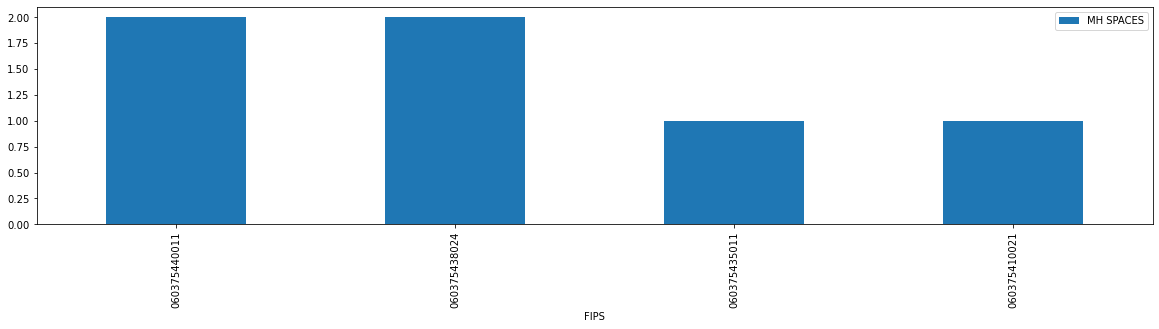

In [135]:
# make a bar chart of top 10 parks
mhp_by_gdf[:10].plot.bar(figsize=(20,4),
                             x='FIPS',
                             y='MH SPACES')

In [136]:
# join the summary table back to the gdf
mhp_carson = mhp_carson.merge(mhp_by_gdf,on='FIPS')

In [137]:
mhp_carson.head()

FIPS  TotalPop                                           geometry  \
0  060375410021    3318.0  MULTIPOLYGON (((-13167173.162 4013433.257, -13...   
1  060375435011    1111.0  MULTIPOLYGON (((-13168040.786 4009844.498, -13...   
2  060375438024    2001.0  MULTIPOLYGON (((-13166018.334 4005859.662, -13...   
3  060375440011     570.0  MULTIPOLYGON (((-13160522.936 4007229.825, -13...   

   MH SPACES  
0          1  
1          1  
2          2  
3          2

In [143]:
mhp_carson['mhp_per_1000'] = mhp_carson['MH SPACES']/mhp_carson['TotalPop']*1000

In [144]:
mhp_carson.sort_values(by='mhp_per_1000').tail()

FIPS  TotalPop                                           geometry  \
0  060375410021    3318.0  MULTIPOLYGON (((-13167173.162 4013433.257, -13...   
1  060375435011    1111.0  MULTIPOLYGON (((-13168040.786 4009844.498, -13...   
2  060375438024    2001.0  MULTIPOLYGON (((-13166018.334 4005859.662, -13...   
3  060375440011     570.0  MULTIPOLYGON (((-13160522.936 4007229.825, -13...   

   MH SPACES  mh_per_1000  mhp_per_1000  
0          1     0.301386      0.301386  
1          1     0.900090      0.900090  
2          2     0.999500      0.999500  
3          2     3.508772      3.508772

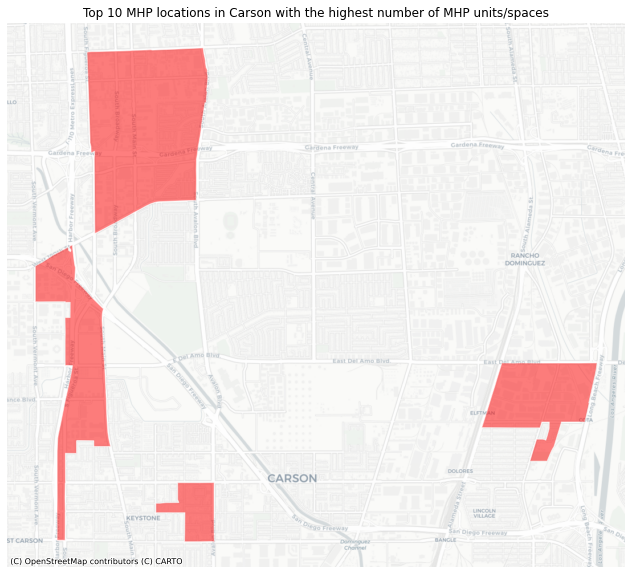

In [145]:
# map the top 10 geographies
fig,ax = plt.subplots(figsize=(12,10))
mhp_carson.sort_values(by='mhp_per_1000',ascending=False)[:10].plot(ax=ax,
                                                                 color='red',
                                                                 edgecolor='white',
                                                                 alpha=0.5,legend=True)


# title
ax.set_title('Top 10 MHP locations in Carson with the highest number of MHP units/spaces')

# no axis
ax.axis('off')

# add a basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

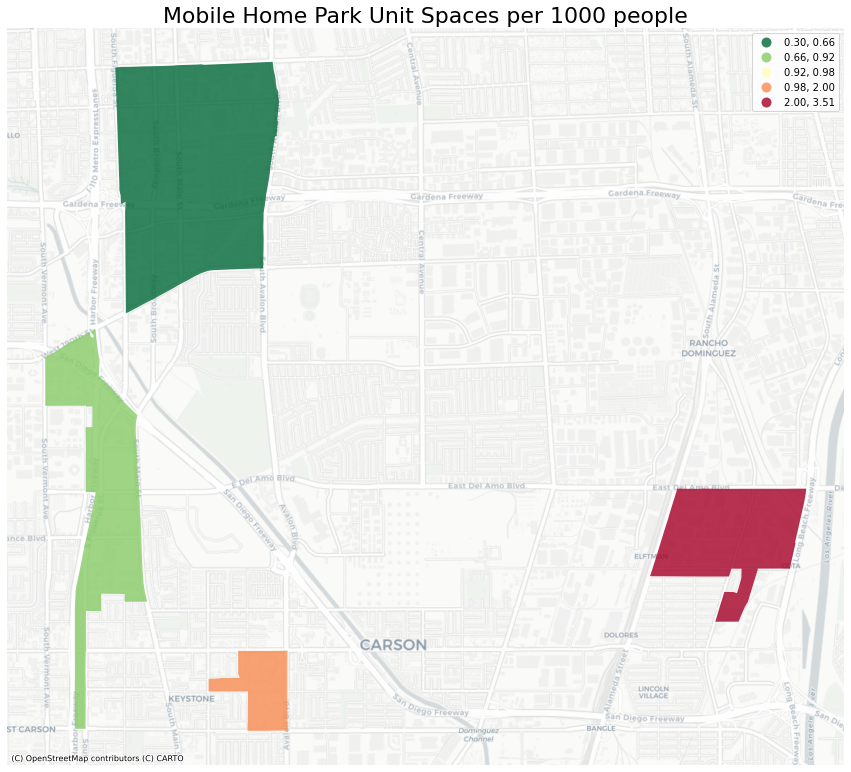

In [146]:
fig,ax = plt.subplots(figsize=(15,15))

mhp_carson.plot(ax=ax,
        column='mhp_per_1000',
        legend=True,
        alpha=0.8,
        cmap='RdYlGn_r',
        scheme='quantiles')

ax.axis('off')
ax.set_title('Mobile Home Park Unit Spaces per 1000 people',fontsize=22)
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

In [174]:
# calculate spatial weight
wq = lps.weights.KNN.from_dataframe(mhp_carson, k=3)

# Row-standardization
wq.transform = 'r'

In [175]:
# create a new column for the spatial lag
mhp_carson['mhp_per_1000_lag'] = lps.weights.lag_spatial(wq, mhp_carson['mhp_per_1000'])

In [180]:
mhp_carson.sample(3)[['FIPS','TotalPop','MH SPACES','mhp_per_1000','mhp_per_1000_lag']]

FIPS  TotalPop  MH SPACES  mhp_per_1000  mhp_per_1000_lag
1  060375435011    1111.0          1      0.900090          1.603220
2  060375438024    2001.0          2      0.999500          1.570083
3  060375440011     570.0          2      3.508772          0.733659

In [181]:
# create a column that calculates the difference betwen mobile homes and lag
mhp_carson['mhp_lag_diff'] = mhp_carson['mhp_per_1000'] - mhp_carson['mhp_per_1000_lag']

In [182]:
# output to get the head and tail
mhp_carson.sort_values(by='mhp_lag_diff')

FIPS  TotalPop                                           geometry  \
0  060375410021    3318.0  MULTIPOLYGON (((-13167173.162 4013433.257, -13...   
1  060375435011    1111.0  MULTIPOLYGON (((-13168040.786 4009844.498, -13...   
2  060375438024    2001.0  MULTIPOLYGON (((-13166018.334 4005859.662, -13...   
3  060375440011     570.0  MULTIPOLYGON (((-13160522.936 4007229.825, -13...   

   MH SPACES  mh_per_1000  mhp_per_1000  mhp_per_1000_lag  mhp_lag_diff  
0          1     0.301386      0.301386          1.802787     -1.501401  
1          1     0.900090      0.900090          1.603220     -0.703130  
2          2     0.999500      0.999500          1.570083     -0.570583  
3          2     3.508772      3.508772          0.733659      2.775113

In [183]:
# the FIPS with highest negative difference
mhp_carson_donut = mhp_carson.sort_values(by='mhp_lag_diff').head(1)

In [184]:
mhp_carson_donut

FIPS  TotalPop                                           geometry  \
0  060375410021    3318.0  MULTIPOLYGON (((-13167173.162 4013433.257, -13...   

   MH SPACES  mh_per_1000  mhp_per_1000  mhp_per_1000_lag  mhp_lag_diff  
0          1     0.301386      0.301386          1.802787     -1.501401

In [185]:
# the FIPS with highest positive difference
mhp_carson_diamond = mhp_carson.sort_values(by='mhp_lag_diff').tail(1)
mhp_carson_diamond

FIPS  TotalPop                                           geometry  \
3  060375440011     570.0  MULTIPOLYGON (((-13160522.936 4007229.825, -13...   

   MH SPACES  mh_per_1000  mhp_per_1000  mhp_per_1000_lag  mhp_lag_diff  
3          2     3.508772      3.508772          0.733659      2.775113

In [187]:
# set the mapbox access token
token = 'sk.eyJ1IjoiYXVyZWxpYW1jMTk5NiIsImEiOiJja3dkODBidjM0ZzIxMnVsdGYzZGdwdDJkIn0.OiISmc6UtaE_-r7W9cJ1rg'
px.set_mapbox_access_token(token)

In [189]:
# subset donut, project to WGS84, and get its centroid
mhp_carson_donut = mhp_carson_donut.to_crs('epsg:4326')

# what's the centroid?
minx, miny, maxx, maxy = mhp_carson_donut.geometry.total_bounds
center_lat_donut = (maxy-miny)/2+miny
center_lon_donut = (maxx-minx)/2+minx

In [190]:
# subset diamond, project to WGS84, and get its centroid
mhp_carson_diamond = mhp_carson_diamond.to_crs('epsg:4326')

# what's the centroid?
minx, miny, maxx, maxy = mhp_carson_diamond.geometry.total_bounds
center_lat_diamond = (maxy-miny)/2+miny
center_lon_diamond = (maxx-minx)/2+minx

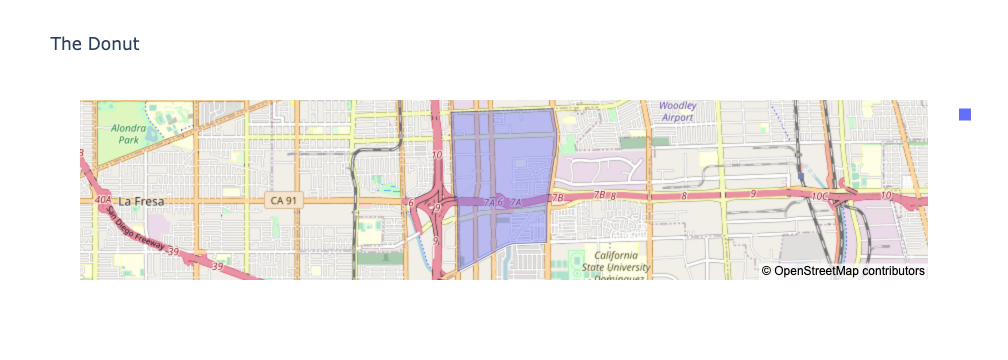

In [207]:
px.choropleth_mapbox(mhp_carson_donut, 
                     geojson = mhp_carson_donut.geometry, 
                     locations = mhp_carson_donut.index, 
                     mapbox_style = "open-street-map",
                     zoom=12, 
                     center = {"lat": center_lat_donut, "lon": center_lon_donut},
                     hover_data=['FIPS','TotalPop','MH SPACES','mhp_per_1000','mhp_per_1000_lag'],
                     opacity=0.4,
                     title='The Donut')

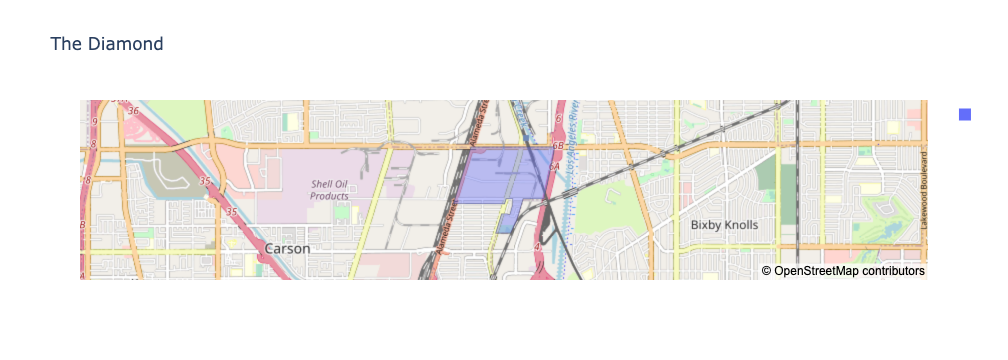

In [204]:
px.choropleth_mapbox(mhp_carson_diamond, 
                     geojson=mhp_carson_diamond.geometry, 
                     locations=mhp_carson_diamond.index, 
                     mapbox_style="open-street-map",
                     zoom=12, 
                     center = {"lat": center_lat_diamond, "lon": center_lon_diamond},
                     hover_data=['FIPS','TotalPop','MH SPACES','mhp_per_1000','mhp_per_1000_lag'],
                     opacity=0.4,
                     title='The Diamond')

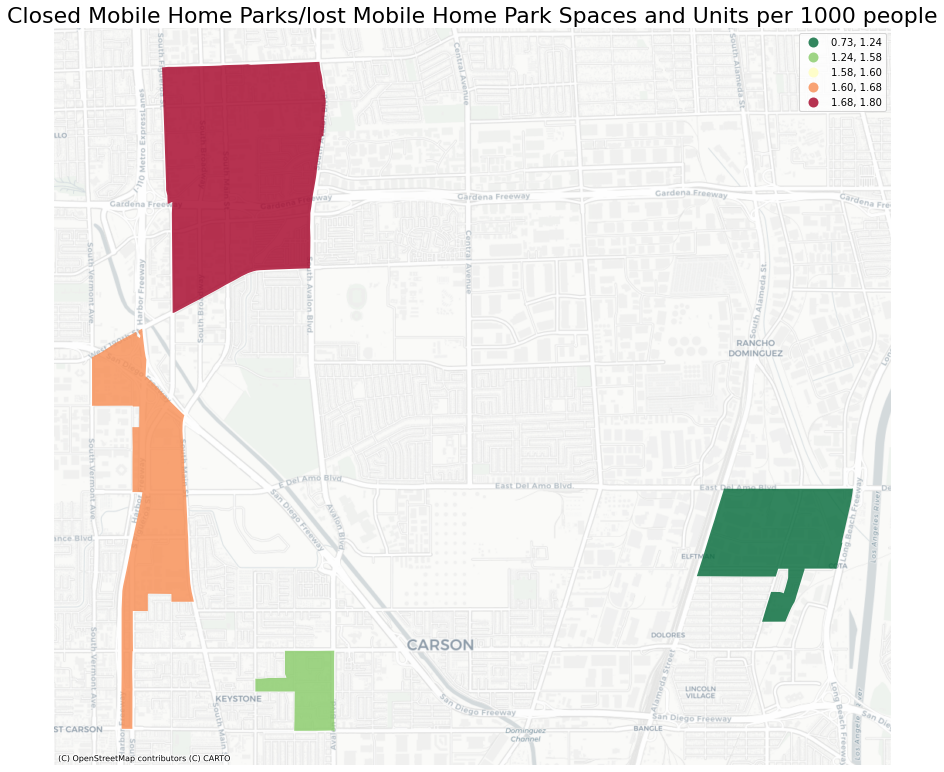

In [208]:
# use subplots that make it easier to create multiple layered maps
fig, ax = plt.subplots(figsize=(15, 15))

# spatial lag choropleth
mhp_carson.plot(ax=ax,
         figsize=(15,15),
         column='mhp_per_1000_lag',
         legend=True,
         alpha=0.8,
         cmap='RdYlGn_r',
         scheme='quantiles')

ax.axis('off')
ax.set_title('Closed Mobile Home Parks/lost Mobile Home Park Spaces and Units per 1000 people',fontsize=22)

ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

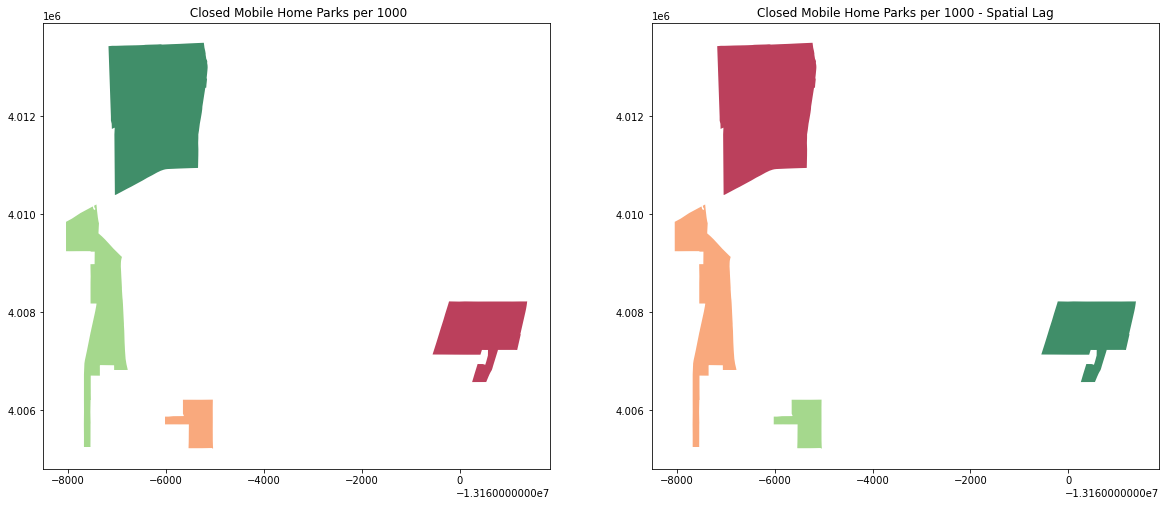

In [212]:
# create the 1x2 subplots
fig, ax = plt.subplots(1, 2, figsize=(20, 12))

# two subplots produces ax[0] (left) and ax[1] (right)

# regular count map on the left
mhp_carson.plot(ax=ax[0], # this assigns the map to the left subplot
         column='mhp_per_1000', 
         cmap='RdYlGn_r', 
         scheme='quantiles',
         k=5, 
         edgecolor='black', 
         linewidth=0, 
         alpha=0.75, 
           )


ax[0].axis("on")
ax[0].set_title(" Closed Mobile Home Parks per 1000")

# spatial lag map on the right
mhp_carson.plot(ax=ax[1], # this assigns the map to the right subplot
         column='mhp_per_1000_lag', 
         cmap='RdYlGn_r', 
         scheme='quantiles',
         k=5, 
         edgecolor='black', 
         linewidth=0, 
         alpha=0.75
           )

ax[1].axis("on")
ax[1].set_title("Closed Mobile Home Parks per 1000 - Spatial Lag")

plt.show()

In [213]:
# interactive version needs to be in WGS84
mhp_carson_web = mhp_carson.to_crs('EPSG:4326')

In [214]:
# what's the centroid?
minx, miny, maxx, maxy = mhp_carson_web.geometry.total_bounds
center_lat_gdf_web = (maxy-miny)/2+miny
center_lon_gdf_web = (maxx-minx)/2+minx

In [216]:
# some stats
mhp_carson_web.mhp_per_1000_lag.describe()

count    4.000000
mean     1.427437
std      0.473801
min      0.733659
25%      1.360977
50%      1.586651
75%      1.653111
max      1.802787
Name: mhp_per_1000_lag, dtype: float64

In [217]:
# grab the median
median = mhp_carson_web.mhp_per_1000_lag.median()

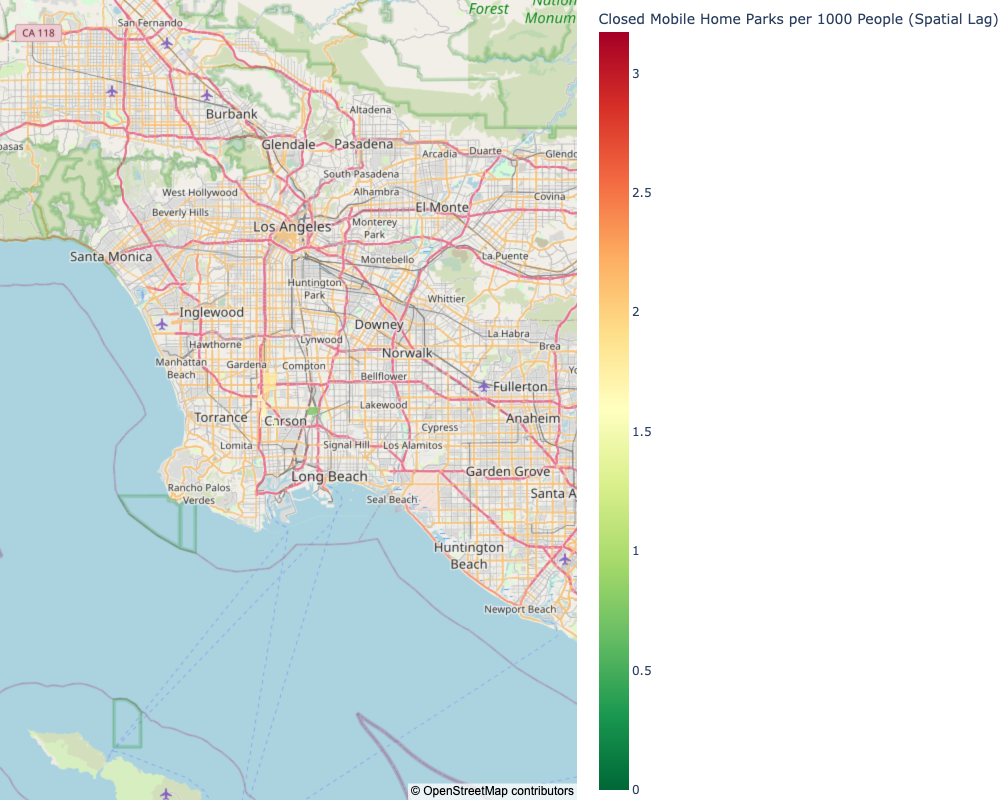

In [221]:
fig = px.choropleth_mapbox(mhp_carson_web, 
                     geojson=mhp_carson_web.geometry, # the geometry column
                     locations=mhp_carson_web.index, # the index
                     mapbox_style="open-street-map",
                     zoom=9, 
                     color='mhp_per_1000_lag',
                     color_continuous_scale='RdYlGn_r',
                     color_continuous_midpoint =median, # put the median as the midpoint
                     range_color =(0,median*2),
                     hover_data=['FIPS','TotalPop','MH SPACES','mhp_per_1000','mhp_per_1000_lag'],
                     center = {"lat": center_lat_gdf_web, "lon": center_lon_gdf_web},
                     opacity=0.8,
                     width=1000,
                     height=800,
                     labels={
                             'mhp_per_1000_lag':'Closed Mobile Home Parks per 1000 People (Spatial Lag)',
                             'arrests_per_1000':'Closed Mobile Home Parks per 1000 People',
                     })
fig.update_traces(marker_line_width=0.1, marker_line_color='white')
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

In [222]:
y = mhp_carson.mhp_per_1000
moran = Moran(y, wq)
moran.I

/opt/conda/lib/python3.9/site-packages/esda/moran.py:232: RuntimeWarning:

invalid value encountered in double_scalars

/opt/conda/lib/python3.9/site-packages/esda/moran.py:166: RuntimeWarning:

divide by zero encountered in double_scalars



-0.33333333333333326

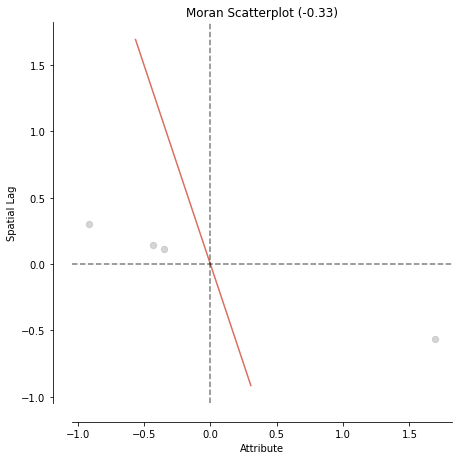

In [223]:
fig, ax = moran_scatterplot(moran, aspect_equal=True)
plt.show()

(<Figure size 504x504 with 1 Axes>,
 <AxesSubplot:title={'center':'Reference Distribution'}, xlabel='Moran I: -0.33', ylabel='Density'>)

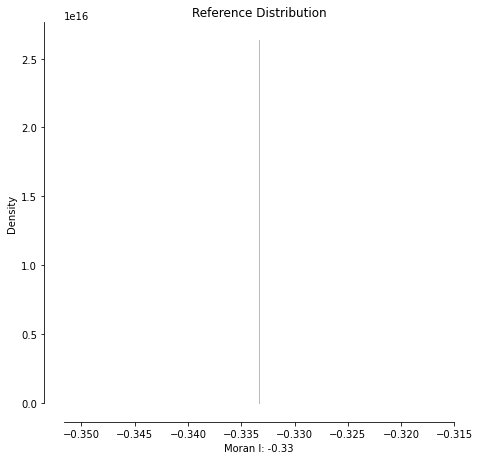

In [231]:
plot_moran_simulation(moran,aspect_equal=False)

In [232]:
moran.p_sim

0.08

In [225]:
# calculate local moran values
lisa = esda.moran.Moran_Local(y, wq)

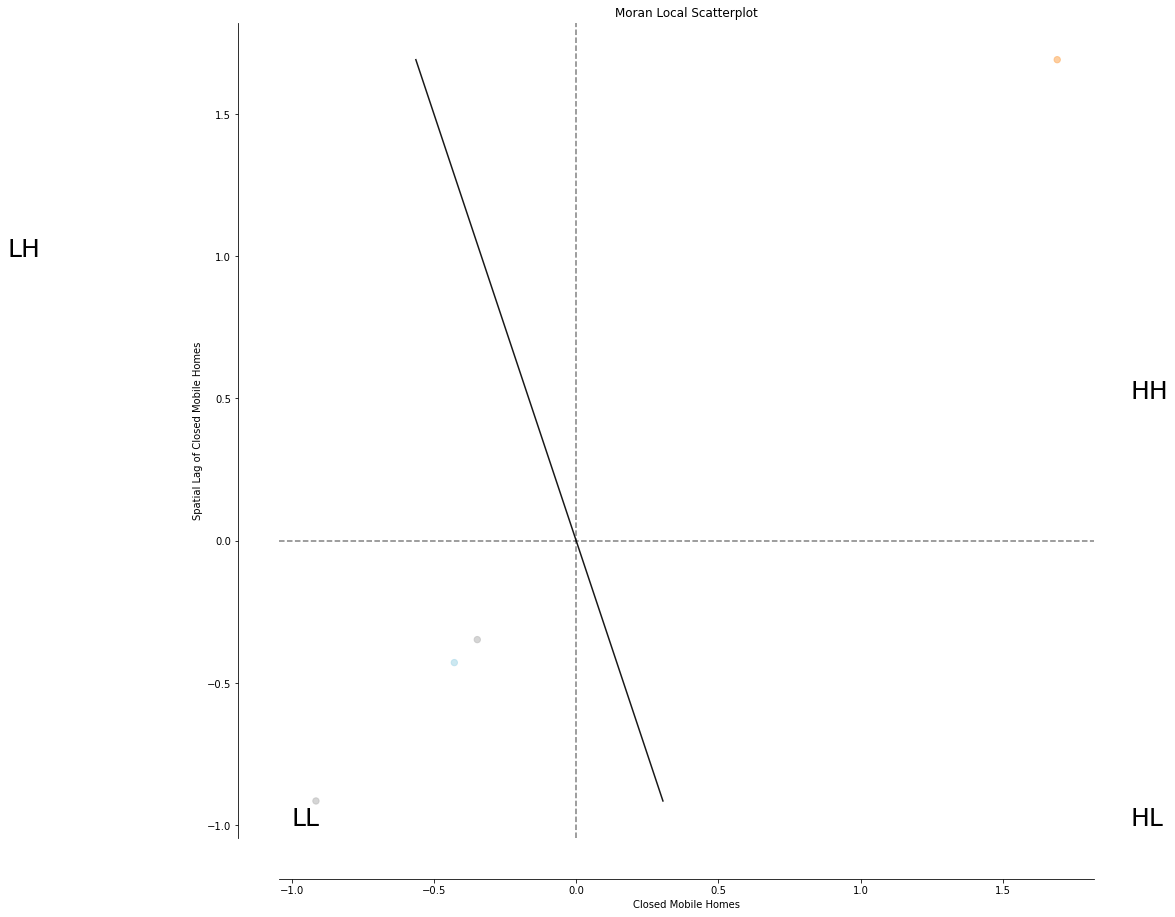

In [230]:
# Plot
fig,ax = plt.subplots(figsize=(20,15))

moran_scatterplot(lisa, ax=ax, p=0.05)
ax.set_xlabel("Closed Mobile Homes")
ax.set_ylabel('Spatial Lag of Closed Mobile Homes')

# add some labels
plt.text(1.95, 0.5, "HH", fontsize=25)
plt.text(1.95, -1, "HL", fontsize=25)
plt.text(-2, 1, "LH", fontsize=25)
plt.text(-1, -1, "LL", fontsize=25)
plt.show()

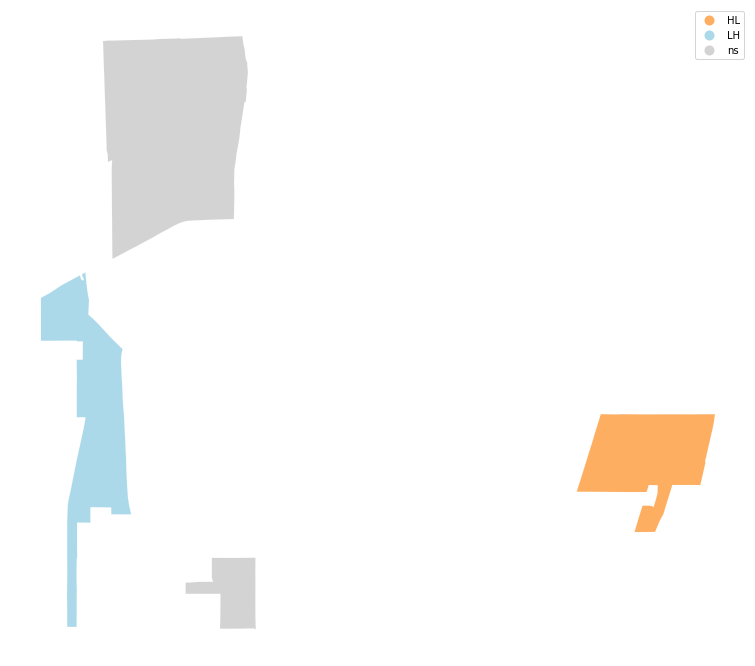

In [228]:
fig, ax = plt.subplots(figsize=(14,12))
lisa_cluster(lisa, mhp_carson, p=0.05, ax=ax)
plt.show()

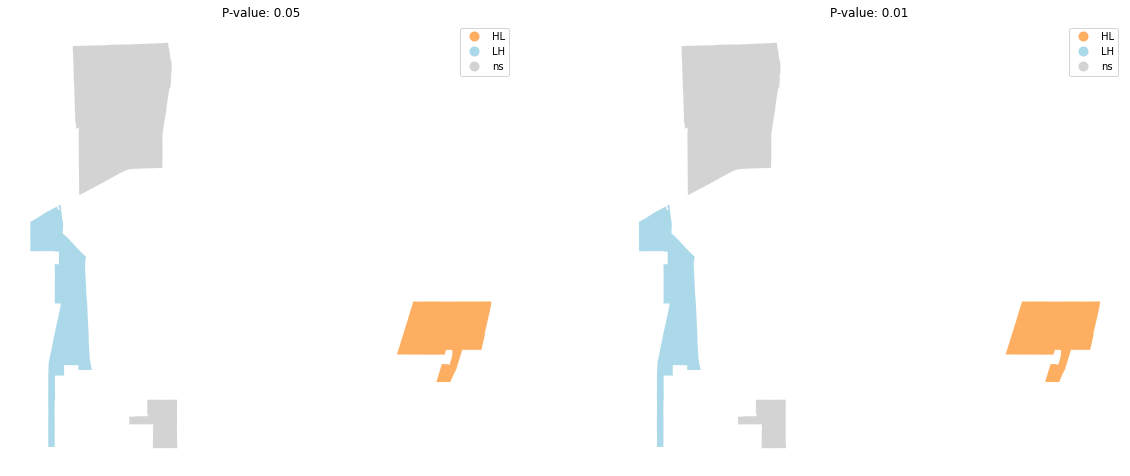

In [233]:
# create the 1x2 subplots
fig, ax = plt.subplots(1, 2, figsize=(20, 12))

# regular count map on the left
lisa_cluster(lisa, mhp_carson, p=0.05, ax=ax[0])

ax[0].axis("off")
ax[0].set_title("P-value: 0.05")

# spatial lag map on the right
lisa_cluster(lisa, mhp_carson, p=0.01, ax=ax[1])
ax[1].axis("off")
ax[1].set_title("P-value: 0.01")

plt.show()